In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import urllib.request

import matplotlib.pyplot as plt # plotting library
import seaborn as sns

import robustocs as rocs
from robustocs import utils
from robustocs import pedigree


In [19]:
# Importing data

# load in the problem variables
sigma, mubar, omega, n, _, _, _ = rocs.load_problem(
    sigma_filename="../data/A1000_Ivan.txt",
    mu_filename="../data/EBV1000_Ivan.txt",
    omega_filename="../data/S1000_Ivan.txt",
    issparse=True
)

file_path = "../data/SEX1000_Ivan.txt"

# Load the file while treating it as a text-based dataset
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

kin = sigma/2

/var/folders/yh/0bk27b457hb862b_2wsrctcr0000gr/T/ipykernel_2031/1963306492.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


In [20]:
print(n)

1000


In [37]:
# Upper and lower bonds
sires = range(0, n, 2)
dams = range(1, n, 2)

# Max contributions definition

# upper
upper = np.zeros(n)
upper[::2] = 0.5  
upper[1::2] = 0.001

# lower
lower = np.zeros(n)
lower[::2] = 0.0  
lower[1::2] = 0.001 

print(upper)
print(lower)


[0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001
 0.5   0.001 0.5   0.001 0.5   0.001 0.5   0.001 0.

There are different selection methods, 

# Truncation selection

Truncation selection is known to be the most efficient form of directional selection (Kimura, xxx). With this metodology the best individuals from a population are selected for reproduction. However, in this was usually maximized genetic gain with no or an implicit limitations of rates of inbreeding.  

For truncation selection, individuals are ranked based on the EBV, then only the best are choosen as parent for the next generation. 

![Example Image](../images/truncation.png)


## Description

In the truncation scenario, lambda (the penalty on group coancestry) and kappa (the parameter controlling group uncertainty) were both set to 0. Only the contributions for males were optimized, while the contributions for females remained fixed at 0.02.

In [51]:
# Parameters
lam = 0
kap = 0

In [52]:

# Model

w_truncation, z_truncation, obj_truncation = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=kap, dimension=n, lower_bound=lower, upper_bound=upper)

Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms
Hessian has dimension 1000 but no nonzeros, so is ignored


In [53]:
# Statistics truncation

# Expected genetic gain
genetic_gain_sel_truncation = utils.expected_genetic_merit(w_truncation, mubar)

# Expected group coancestry
group_coancestry_sel_truncation = utils.group_coancestry(w_truncation,sigma)

# Expected grouo uncertainty
group_uncertainty_truncation = z_truncation


print("Expected genetic gain:", genetic_gain_sel_truncation)
print("Expected group coancestry:", group_coancestry_sel_truncation)
print("Expected group uncertainty:", group_uncertainty_truncation)

Expected genetic gain: 2.15588076490287
Expected group coancestry: 0.314665917196275
Expected group uncertainty: 0.22627667786791936


In [54]:
print(w_truncation)

[ 0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.     0.001  0.     0.001  0.     0.001  0.     0.001  0.     0.001
  0.  

# Conservation
A strict conservation scenario occurs when a high penalty is applied to group coancestry (lambda). In this exercise, we empirically determined the lambda value by increasing it until genetic gain reached a minimum and stabilized (lambda = 1001).  and kappa was set to 0.



In [39]:
# Parameters
lam = 1001
kap = 0

In [34]:
# Model

w_conservation, z_conservation, obj_conservation = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=kap, dimension=n, upper_bound=upper, lower_bound=lower)

Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms


In [35]:
# Statistics conservation

# Expected genetic gain
genetic_gain_sel_conservation = utils.expected_genetic_merit(w_conservation, mubar)

# Expected group coancestry
group_coancestry_sel_conservation = utils.group_coancestry(w_conservation,sigma)

# Expected grouo uncertainty
group_uncertainty_conservation = z_conservation


print("Expected genetic gain:", genetic_gain_sel_conservation)
print("Expected group coancestry:", group_coancestry_sel_conservation)
print("Expected group uncertainty:", group_uncertainty_conservation)

Expected genetic gain: 1.798111242325652
Expected group coancestry: 0.06921154857968256
Expected group uncertainty: 0.0730211045486793


In [36]:
print(w_conservation)

[8.31009500e-22 1.00000000e-03 0.00000000e+00 1.00000000e-03
 1.75698718e-03 1.00000000e-03 1.90835094e-03 1.00000000e-03
 1.66704182e-03 1.00000000e-03 3.47559898e-03 1.00000000e-03
 2.71768129e-03 1.00000000e-03 0.00000000e+00 1.00000000e-03
 0.00000000e+00 1.00000000e-03 1.53711098e-04 1.00000000e-03
 0.00000000e+00 1.00000000e-03 0.00000000e+00 1.00000000e-03
 0.00000000e+00 1.00000000e-03 0.00000000e+00 1.00000000e-03
 0.00000000e+00 1.00000000e-03 1.84791681e-03 1.00000000e-03
 5.98846799e-06 1.00000000e-03 0.00000000e+00 1.00000000e-03
 2.06928502e-03 1.00000000e-03 1.19818138e-03 1.00000000e-03
 3.16113844e-04 1.00000000e-03 0.00000000e+00 1.00000000e-03
 0.00000000e+00 1.00000000e-03 0.00000000e+00 1.00000000e-03
 2.50976962e-03 1.00000000e-03 0.00000000e+00 1.00000000e-03
 0.00000000e+00 1.00000000e-03 0.00000000e+00 1.00000000e-03
 7.09152215e-03 1.00000000e-03 0.00000000e+00 1.00000000e-03
 0.00000000e+00 1.00000000e-03 6.36054152e-03 1.00000000e-03
 4.69879232e-04 1.000000

# Uncertainty

For this scenario, the value of kappa was adjusted until genetic gain reached a minimum and remained constant, while lambda was set to 0. 

In [40]:
# Parameters

lam = 0
kap = 100

In [41]:
# Model

w_uncertainty, z_uncertainty, obj_uncertainty = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=kap, dimension=n, upper_bound=upper, lower_bound=lower)

Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms
Hessian has dimension 1000 but no nonzeros, so is ignored


In [42]:
# Statistics uncertainty

# Expected genetic gain
genetic_gain_sel_uncertainty = utils.expected_genetic_merit(w_uncertainty, mubar)

# Expected group coancestry
group_coancestry_sel_uncertainty = utils.group_coancestry(w_uncertainty,sigma)

# Expected grouo uncertainty
group_uncertainty_uncertainty = z_uncertainty


print("Expected genetic gain:", genetic_gain_sel_uncertainty)
print("Expected group coancestry:", group_coancestry_sel_uncertainty)
print("Expected group uncertainty:", group_uncertainty_uncertainty)

Expected genetic gain: 1.8664731659559335
Expected group coancestry: 0.07683785397656497
Expected group uncertainty: 0.06101842951720495


In [43]:

# Sample DataFrame
results = pd.DataFrame({
    " ": ["Expected genetic gain", "Expected group coancestry", "group uncertainty", "Realised genetic gain", "Realised group coancestry", "Realised rate", "Realised Ne"],
    "Truncation": [genetic_gain_sel_truncation, group_coancestry_sel_truncation, group_uncertainty_truncation, 2.085498, 0.3449985, 0.02852195, 17],
    "Conservation": [genetic_gain_sel_conservation, group_coancestry_sel_conservation, group_uncertainty_conservation, 2.192449, 0.1173435, 0.03158581, 15],
    "Uncertainty": [genetic_gain_sel_uncertainty, group_coancestry_sel_uncertainty, group_uncertainty_uncertainty, 2.13012, 0.1158029, 0.0290183, 17], 
})

results = round(results, 3)

# Convert DataFrame to Markdown Table
print(results.to_markdown(index=False))  # Requires 'tabulate' package

|                           |   Truncation |   Conservation |   Uncertainty |
|:--------------------------|-------------:|---------------:|--------------:|
| Expected genetic gain     |        2.156 |          1.798 |         1.866 |
| Expected group coancestry |        0.315 |          0.069 |         0.077 |
| group uncertainty         |        0.226 |          0.073 |         0.061 |
| Realised genetic gain     |        2.085 |          2.192 |         2.13  |
| Realised group coancestry |        0.345 |          0.117 |         0.116 |
| Realised rate             |        0.029 |          0.032 |         0.029 |
| Realised Ne               |       17     |         15     |        17     |


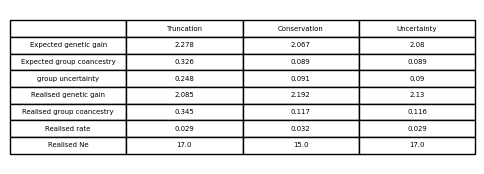

In [18]:
# Convert DataFrame to an Image
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results.values, colLabels=results.columns, cellLoc="center", loc="center")

# Save as an image file
plt.savefig("mating_plan.png", dpi=10000, bbox_inches="tight")
plt.show()

As expected, the results indicate that in the absence of penalization on group coancestry and group uncertainty, the expected genetic gain, expected group coancestry, and group uncertainty are at their highest. Additionally, expected genetic gain and expected coancestry are slightly higher in the uncertainty scenario compared to the conservation scenario.

In [46]:
df['w_truncation'] = w_truncation
df['w_conservation'] = w_conservation
df['w_uncertainty'] = w_uncertainty
df['ebv'] = mubar

# Rename all columns
df.columns = ["idd", "sex", "w_truncation", "w_conservation", "w_uncertainty", "ebv"]

df.to_csv("../data/output_method1000.txt", 
          index=False)

print(df.head())

     idd sex  w_truncation  w_conservation  w_uncertainty       ebv
0  11001   M         0.000    8.310095e-22          0.000  1.876748
1  11002   F         0.001    1.000000e-03          0.001  1.893205
2  11003   M         0.000    0.000000e+00          0.000  1.871213
3  11004   F         0.001    1.000000e-03          0.001  1.642441
4  11005   M         0.000    1.756987e-03          0.000  1.801041


In [ ]:
output_methods = open('df')

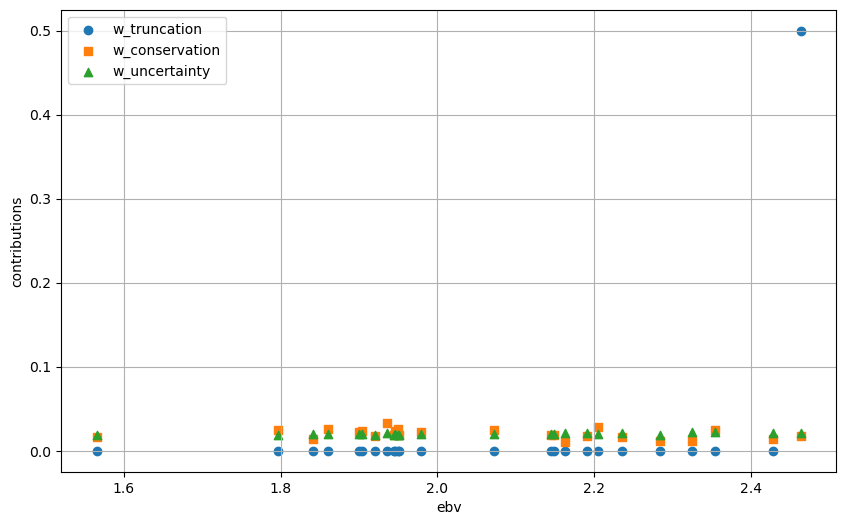

In [47]:

plt.figure(figsize=(10, 6))

df_male = df[df["sex"] == "M"]

plt.scatter(df_male["ebv"], df_male["w_truncation"], label="w_truncation", marker="o")
plt.scatter(df_male["ebv"], df_male["w_conservation"], label="w_conservation", marker="s")
plt.scatter(df_male["ebv"], df_male["w_uncertainty"], label="w_uncertainty", marker="^")

plt.xlabel("ebv")
plt.ylabel("contributions")
plt.legend()
plt.grid(True)
plt.show()

The animal with the highest EBV was selected as parents for the next generation. The contributions for the 25 males in scenario conservation and uncertainty are >0.01 and all males were selected as parents for future generation. 

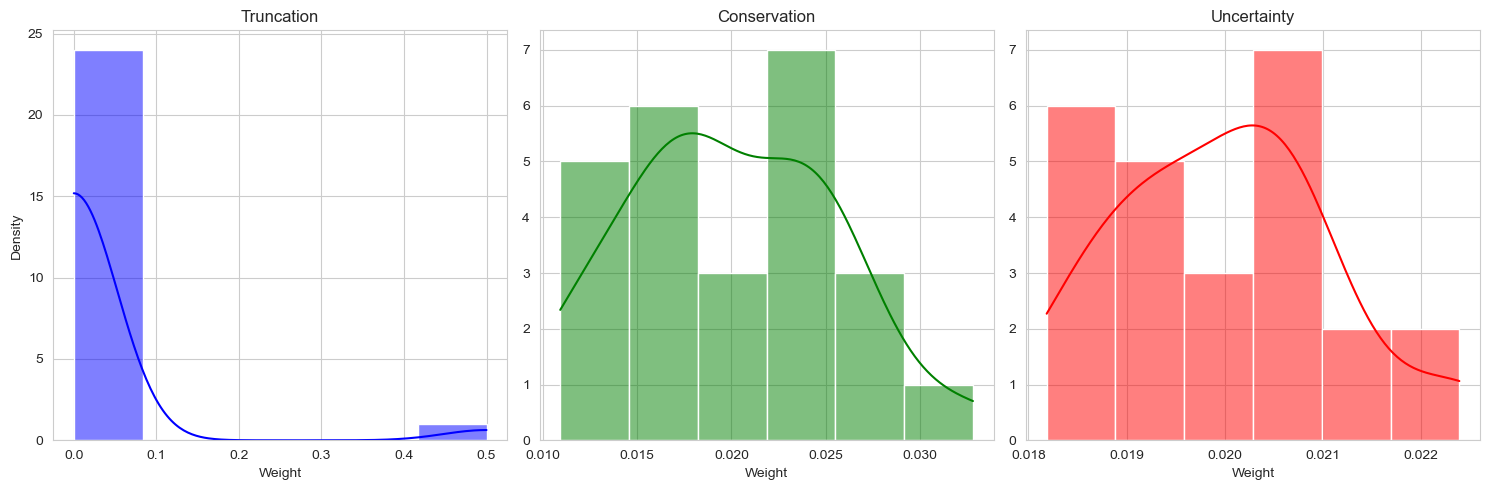

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each distribution in its own subplot
sns.histplot(df_male["w_truncation"], kde=True, ax=axes[0], color="blue")
axes[0].set_title("Truncation")
axes[0].set_xlabel("Weight")
axes[0].set_ylabel("Density")

sns.histplot(df_male["w_conservation"], kde=True, ax=axes[1], color="green")
axes[1].set_title("Conservation")
axes[1].set_xlabel("contributions")
axes[1].set_ylabel("")

sns.histplot(df_male["w_uncertainty"], kde=True, ax=axes[2], color="red")
axes[2].set_title("Uncertainty")
axes[2].set_xlabel("Weight")
axes[2].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/yh/0bk27b457hb862b_2wsrctcr0000gr/T/ipykernel_2031/3808577682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.normal(size=1000), hist=False)


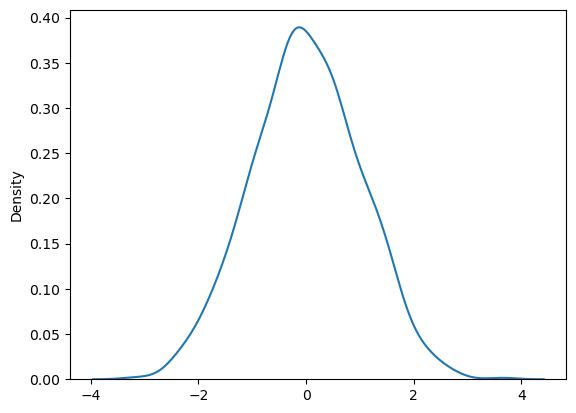

In [ ]:
sns.distplot(random.normal(size=1000), hist=False)

plt.show()
